<a href="https://colab.research.google.com/github/iEpsilon-FPS/QU-MLinF/blob/master/3.7%20Unsupervised_Learning_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Market Data
## Unsupervised Learning: Dimension Reduction

In [ ]:
# Install this if you don't have yfinance
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=2d4d62bd22e642c71e6fc35829a7704d366b2f1279b79023c14dcdcd7793e7fd
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
# Acknowledgement: Affinity Propogation Code modified from original code:
# See: https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html

import datetime
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.collections import LineCollection

from sklearn import cluster, covariance, manifold

###############################################################################
# Retrieve the data from Internet

d1 = datetime.datetime(2019, 05, 1)
d2 = datetime.datetime(2019, 12, 31)

symbol_dict = {
'MMM':'3M',
'AXP':'American Express',
'AAPL':'Apple',
'BA':'Boeing',
'CAT':'Caterpillar',
'CVX':'Chevron',
'CSCO':'Cisco',
'KO':'Coca-Cola',
'DIS':'Disney',
'DOW':'Dow',
'XOM':'ExxonMobil',
'GS':'Goldman Sachs',
'HD':'Home Depot',
'IBM':'IBM',
'INTC':'Intel',
'JNJ':'Johnson & Johnson',
'JPM':'JP Morgan Chase',
'MCD':'McDonalds',
'MRK':'Merck',
'MSFT':'Microsoft',
'NKE':'Nike',
'PFE':'Pfizer',
'PG':'Procter & Gamble',
'RTX':'Raytheon Technologies',
'TRV':'Travelers',
'UNH':'UnitedHealth',
'VZ':'Verizon',
'V':'Visa',
'WBA':'Walgreens',
'WMT':'Wal-Mart'}
symbols, names = np.array(list(symbol_dict.items())).T

In [ ]:
names

array(['American Express', 'Boeing', 'Chevron', 'Cisco', 'Apple', 'Visa',
       'Caterpillar', 'Walgreens', 'Dow', 'Microsoft', 'IBM',
       'Home Depot', 'Disney', 'Raytheon Technologies',
       'Procter & Gamble', 'Goldman Sachs', 'Intel', 'Wal-Mart', 'Merck',
       'UnitedHealth', 'JP Morgan Chase', 'Verizon', 'ExxonMobil',
       'Travelers', 'Pfizer', 'Nike', 'McDonalds', 'Coca-Cola', '3M',
       'Johnson & Johnson'], dtype='|S21')

In [ ]:
tickers = [yf.Ticker(symbol) for symbol in symbols]
quotes= [ticker.history(start = d1, end = d2) for ticker in tickers]

In [ ]:
quotes[1].head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-01,369.66,372.27,367.56,367.97,2765600,0.0,0
2019-05-02,366.71,368.80,364.51,367.00,2438800,0.0,0
2019-05-03,367.27,369.05,365.46,367.64,2953800,0.0,0
2019-05-06,359.26,363.76,357.07,362.90,4747600,0.0,0
2019-05-07,357.75,359.10,346.70,348.86,9740300,0.0,0


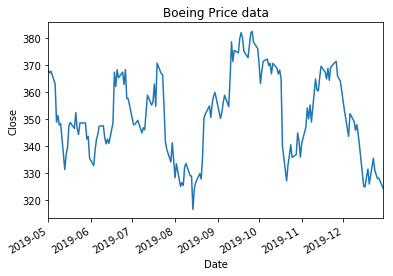

In [ ]:
ba = quotes[1]
ba["Close"].plot()
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Boeing Price data")
plt.show()

In [ ]:
closes = np.array([q.Close.to_numpy() for q in quotes])
opens = np.array([q.Open.to_numpy() for q in quotes])
df = pd.DataFrame(closes.T, columns = symbol_dict)
df.head()

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
0,115.17,367.97,111.39,53.91,207.24,161.53,133.85,51.32,52.85,125.86,132.51,193.67,134.73,86.22,102.30,200.18,49.32,99.01,76.52,227.98,111.56,54.20,73.41,139.75,38.87,84.98,189.61,47.10,177.86,137.14
1,115.40,367.00,110.04,53.28,205.89,159.87,130.96,51.43,49.62,124.22,131.60,195.83,132.52,85.13,102.91,200.43,49.11,98.80,77.30,228.47,111.80,54.65,72.12,139.38,39.09,84.36,190.04,46.90,176.60,136.50
2,117.46,367.64,110.88,53.28,208.45,160.79,134.73,51.70,50.19,126.86,132.22,195.39,132.71,86.25,103.42,202.91,50.28,99.71,77.76,227.98,112.49,54.89,72.29,140.01,39.46,84.78,192.89,47.22,177.05,137.20
3,117.45,362.90,111.95,52.94,205.23,161.02,132.50,51.55,50.34,126.13,132.34,194.48,133.37,85.38,103.03,201.84,50.07,100.08,77.26,236.38,111.49,54.58,71.97,140.09,39.70,82.68,194.23,46.98,174.96,137.28
4,116.35,348.86,111.83,51.84,199.70,158.97,129.51,50.61,49.86,123.54,129.76,189.75,131.83,82.48,102.07,198.13,49.34,98.95,75.72,233.97,109.67,54.31,71.59,138.41,38.92,81.66,193.39,46.52,171.22,135.23


In [ ]:
returns = np.log(df) - np.log(df.shift(1))
returns.head().dropna()

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
1,0.001995,-0.002640,-0.012194,-0.011755,-0.006535,-0.010330,-0.021828,0.002141,-0.063064,-0.013116,-0.006891,0.011091,-0.016539,-0.012723,0.005945,0.001248,-0.004267,-0.002123,0.010142,0.002147,0.002149,0.008268,-0.017729,-0.002651,0.005644,-0.007323,0.002265,-0.004255,-0.007109,-0.004678
2,0.017693,0.001742,0.007605,0.000000,0.012357,0.005738,0.028381,0.005236,0.011422,0.021030,0.004700,-0.002249,0.001433,0.013071,0.004944,0.012297,0.023545,0.009168,0.005933,-0.002147,0.006153,0.004382,0.002354,0.004510,0.009421,0.004966,0.014886,0.006800,0.002545,0.005115
3,-0.000085,-0.012977,0.009604,-0.006402,-0.015568,0.001429,-0.016690,-0.002906,0.002984,-0.005771,0.000907,-0.004668,0.004961,-0.010138,-0.003778,-0.005287,-0.004185,0.003704,-0.006451,0.036183,-0.008929,-0.005664,-0.004436,0.000571,0.006064,-0.025082,0.006923,-0.005096,-0.011875,0.000583
4,-0.009410,-0.039457,-0.001072,-0.020997,-0.027315,-0.012813,-0.022825,-0.018403,-0.009581,-0.020748,-0.019688,-0.024622,-0.011614,-0.034556,-0.009361,-0.018552,-0.014687,-0.011355,-0.020134,-0.010248,-0.016459,-0.004959,-0.005294,-0.012065,-0.019843,-0.012413,-0.004334,-0.009840,-0.021608,-0.015046


In [ ]:
# Use zscore to scale the log returns
from sklearn.preprocessing import StandardScaler
#Your code here

In [ ]:
corrMatrix = returns.corr()
corrMatrix

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
AXP,1.000000,0.255577,0.465458,0.497744,0.612093,0.656861,0.519696,0.416777,0.443665,0.686476,0.532417,0.457666,0.420656,0.610543,0.330445,0.659517,0.553512,0.487189,0.346865,0.298961,0.640916,0.311398,0.466168,0.414600,0.333196,0.538147,0.376403,0.321568,0.533342,0.317345
BA,0.255577,1.000000,0.290343,0.245856,0.308745,0.210960,0.368090,0.310983,0.292496,0.336026,0.262402,0.237578,0.114517,0.406179,0.100763,0.343874,0.263812,0.203784,0.073414,0.117707,0.298194,0.068672,0.318828,0.037955,0.076611,0.218303,-0.046049,0.063257,0.273298,0.207987
CVX,0.465458,0.290343,1.000000,0.408053,0.426822,0.257847,0.492498,0.451167,0.556958,0.417624,0.442164,0.283704,0.278140,0.475534,0.034496,0.549031,0.380417,0.259844,0.122761,0.173919,0.548486,0.253137,0.779856,0.168390,0.259354,0.370424,0.020932,0.088456,0.484642,0.162755
CSCO,0.497744,0.245856,0.408053,1.000000,0.544173,0.376219,0.406956,0.378663,0.421389,0.559181,0.497840,0.315188,0.349787,0.458626,0.245509,0.460650,0.478497,0.142124,0.272647,0.240083,0.446591,0.190801,0.444172,0.228029,0.305113,0.495793,0.213156,0.126509,0.399267,0.286977
AAPL,0.612093,0.308745,0.426822,0.544173,1.000000,0.542138,0.571677,0.451917,0.499075,0.636061,0.542077,0.466674,0.400479,0.595166,0.229644,0.625727,0.654552,0.324047,0.270547,0.157484,0.585233,0.130079,0.491236,0.298326,0.308081,0.573565,0.207262,0.227668,0.517455,0.227339
V,0.656861,0.210960,0.257847,0.376219,0.542138,1.000000,0.257055,0.214498,0.278558,0.780945,0.465923,0.424040,0.375599,0.551674,0.396931,0.418724,0.464758,0.484628,0.393274,0.162897,0.378224,0.219989,0.319229,0.561533,0.341779,0.430789,0.427680,0.394393,0.297105,0.209966
CAT,0.519696,0.368090,0.492498,0.406956,0.571677,0.257055,1.000000,0.539188,0.639257,0.417624,0.535328,0.404788,0.295401,0.608218,0.049599,0.668811,0.603847,0.308818,0.055232,0.266861,0.675771,0.174684,0.610623,0.115582,0.334065,0.419137,0.005137,0.090510,0.650874,0.164526
WBA,0.416777,0.310983,0.451167,0.378663,0.451917,0.214498,0.539188,1.000000,0.506207,0.350638,0.446099,0.345049,0.210517,0.452457,0.064496,0.496378,0.377700,0.184735,0.066211,0.286310,0.535404,0.217451,0.490614,0.108910,0.287312,0.362557,-0.006040,0.026861,0.468354,0.208467
DOW,0.443665,0.292496,0.556958,0.421389,0.499075,0.278558,0.639257,0.506207,1.000000,0.419847,0.515420,0.253061,0.198779,0.518483,0.064053,0.604192,0.475796,0.207987,0.104270,0.206237,0.571755,0.189291,0.549341,0.174187,0.296493,0.381601,-0.030101,0.170363,0.546244,0.137733
MSFT,0.686476,0.336026,0.417624,0.559181,0.636061,0.780945,0.417624,0.350638,0.419847,1.000000,0.589852,0.472740,0.403365,0.622770,0.366628,0.521921,0.606568,0.447224,0.390774,0.288254,0.487656,0.198330,0.443642,0.430601,0.345004,0.554133,0.359102,0.345346,0.466389,0.318383


In [ ]:

# Limit number of digits:
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
AXP,1,0.26,0.47,0.5,0.61,0.66,0.52,0.42,0.44,0.69,0.53,0.46,0.42,0.61,0.33,0.66,0.55,0.49,0.35,0.3,0.64,0.31,0.47,0.41,0.33,0.54,0.38,0.32,0.53,0.32
BA,0.26,1,0.29,0.25,0.31,0.21,0.37,0.31,0.29,0.34,0.26,0.24,0.11,0.41,0.1,0.34,0.26,0.2,0.073,0.12,0.3,0.069,0.32,0.038,0.077,0.22,-0.046,0.063,0.27,0.21
CVX,0.47,0.29,1,0.41,0.43,0.26,0.49,0.45,0.56,0.42,0.44,0.28,0.28,0.48,0.034,0.55,0.38,0.26,0.12,0.17,0.55,0.25,0.78,0.17,0.26,0.37,0.021,0.088,0.48,0.16
CSCO,0.5,0.25,0.41,1,0.54,0.38,0.41,0.38,0.42,0.56,0.5,0.32,0.35,0.46,0.25,0.46,0.48,0.14,0.27,0.24,0.45,0.19,0.44,0.23,0.31,0.5,0.21,0.13,0.4,0.29
AAPL,0.61,0.31,0.43,0.54,1,0.54,0.57,0.45,0.5,0.64,0.54,0.47,0.4,0.6,0.23,0.63,0.65,0.32,0.27,0.16,0.59,0.13,0.49,0.3,0.31,0.57,0.21,0.23,0.52,0.23
V,0.66,0.21,0.26,0.38,0.54,1,0.26,0.21,0.28,0.78,0.47,0.42,0.38,0.55,0.4,0.42,0.46,0.48,0.39,0.16,0.38,0.22,0.32,0.56,0.34,0.43,0.43,0.39,0.3,0.21
CAT,0.52,0.37,0.49,0.41,0.57,0.26,1,0.54,0.64,0.42,0.54,0.4,0.3,0.61,0.05,0.67,0.6,0.31,0.055,0.27,0.68,0.17,0.61,0.12,0.33,0.42,0.0051,0.091,0.65,0.16
WBA,0.42,0.31,0.45,0.38,0.45,0.21,0.54,1,0.51,0.35,0.45,0.35,0.21,0.45,0.064,0.5,0.38,0.18,0.066,0.29,0.54,0.22,0.49,0.11,0.29,0.36,-0.006,0.027,0.47,0.21
DOW,0.44,0.29,0.56,0.42,0.5,0.28,0.64,0.51,1,0.42,0.52,0.25,0.2,0.52,0.064,0.6,0.48,0.21,0.1,0.21,0.57,0.19,0.55,0.17,0.3,0.38,-0.03,0.17,0.55,0.14
MSFT,0.69,0.34,0.42,0.56,0.64,0.78,0.42,0.35,0.42,1,0.59,0.47,0.4,0.62,0.37,0.52,0.61,0.45,0.39,0.29,0.49,0.2,0.44,0.43,0.35,0.55,0.36,0.35,0.47,0.32


# PCA Analysis: Compute the Eigenvalues and EigenVectors ; Interpret it
Refer:https://plotly.com/python/v3/ipython-notebooks/principal-component-analysis/